In [1]:
import numpy as np
import pymc as pm;
import matplotlib.pyplot as plt
import scipy.stats as stat
import pytensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
count_data = np.loadtxt("data/txtdata.csv")
days = len(count_data)
x = np.arange(days)

<BarContainer object of 74 artists>

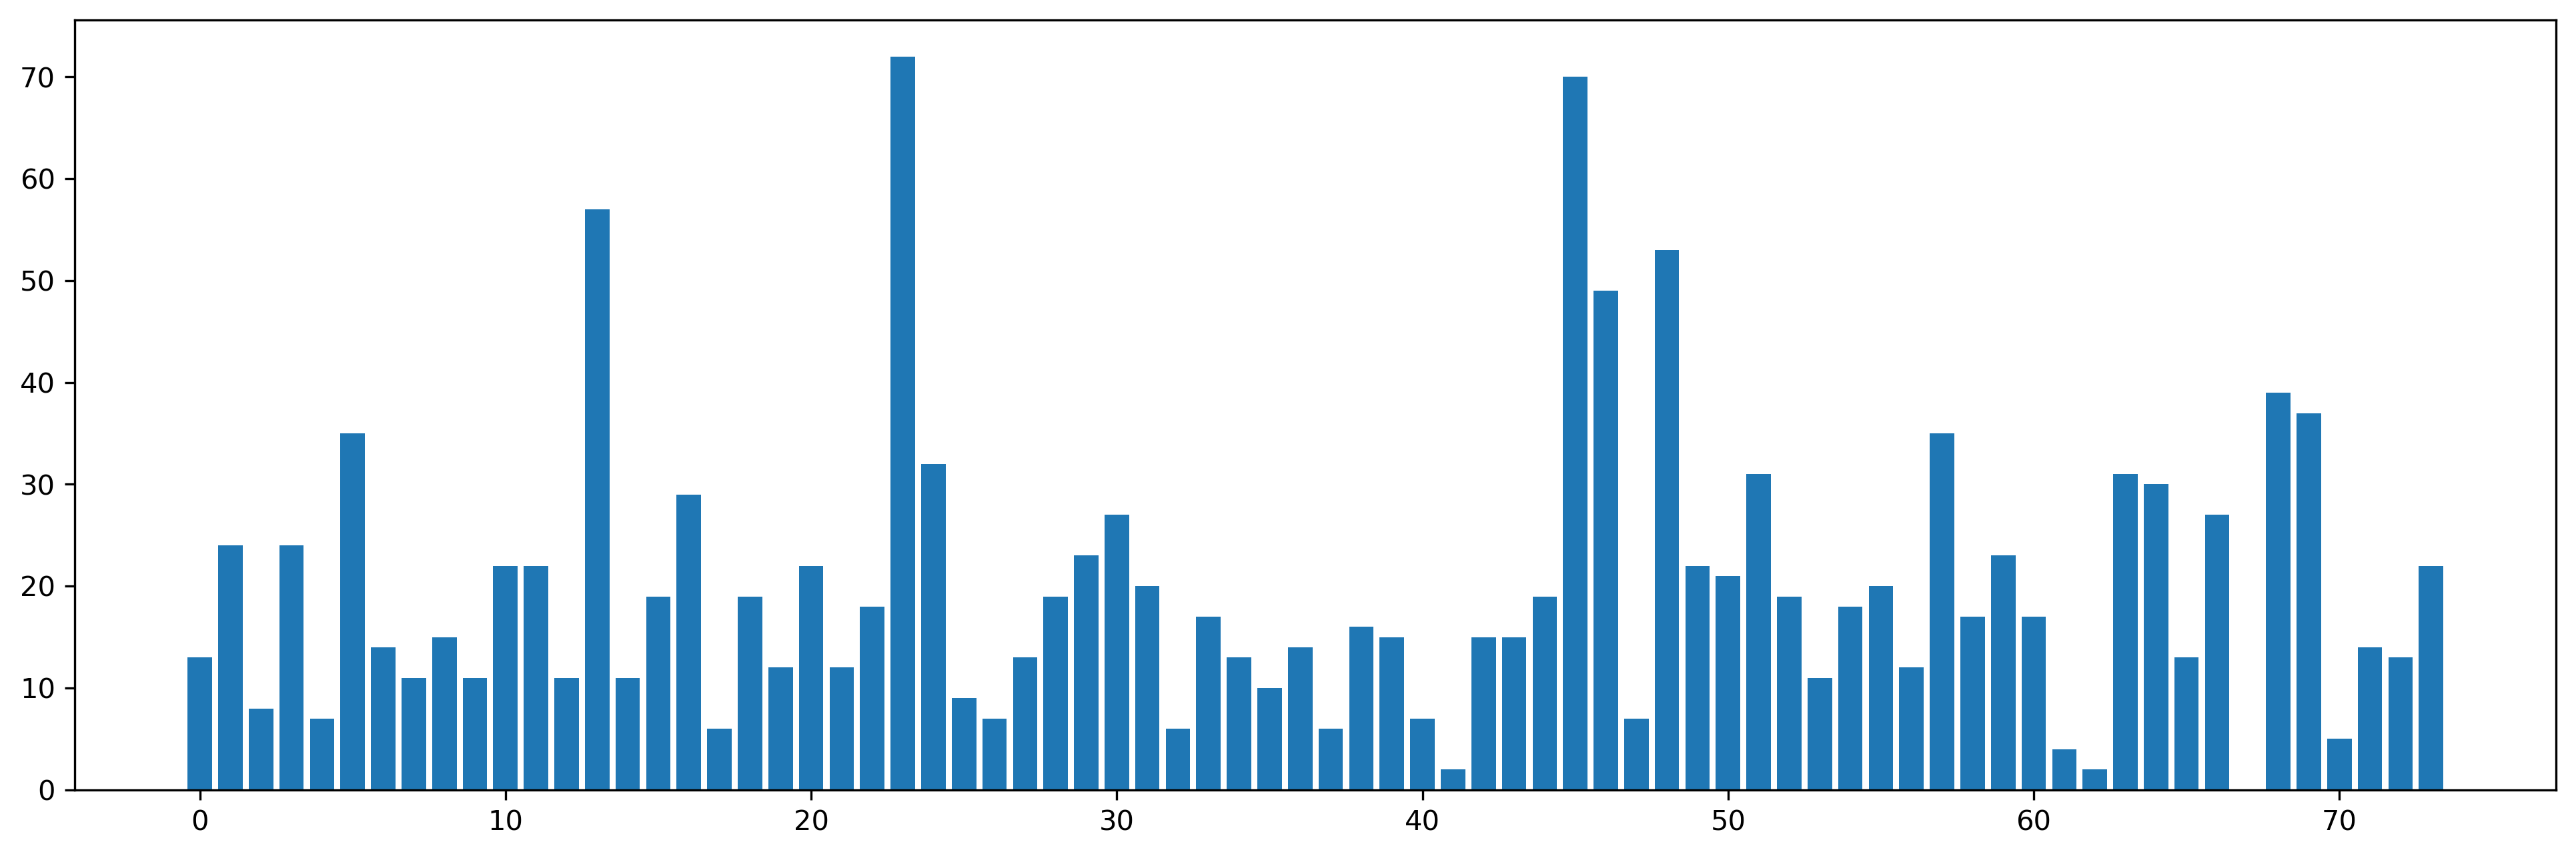

In [4]:
fig,axes = plt.subplots(1,1,figsize=(16,5),dpi=300)
axes.bar(x,count_data)

In [5]:
with pm.Model() as model:
    alpha = 1/count_data.mean()
    lambda1 = pm.Exponential("lambda1",alpha)
    lambda2 = pm.Exponential("lambda2",alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=days - 1)
    idx = np.arange(days)
    lambda_ = pm.math.switch(tau > idx, lambda1, lambda2)
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [6]:
with model:
    step = pm.Metropolis();
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False);

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lambda1]
>Metropolis: [lambda2]
>Metropolis: [tau]


/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 29 seconds.


In [7]:
lambda1_samples = trace["lambda1"]
lambda2_samples = trace["lambda2"]
tau_samples = trace["tau"]

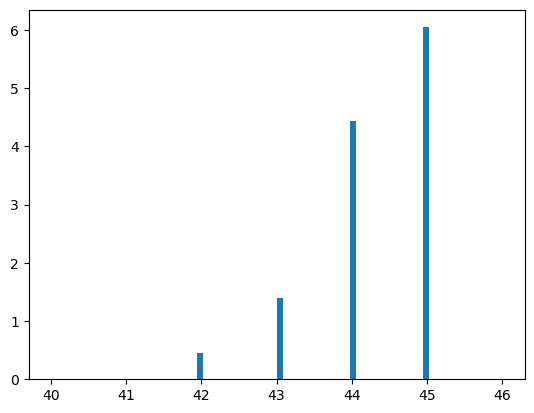

In [8]:
plt.hist(tau_samples, density=True, bins=days);

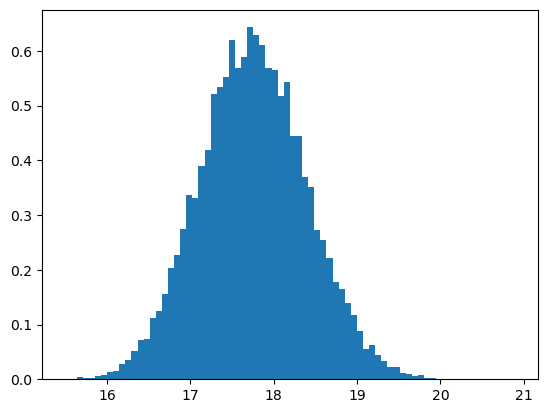

In [9]:
plt.hist(lambda1_samples,density = True, bins=days);

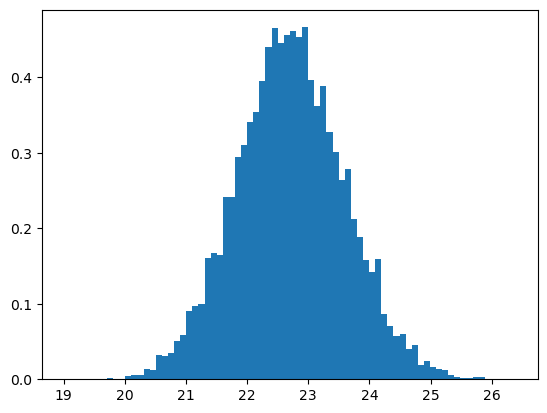

In [10]:
plt.hist(lambda2_samples,density = True, bins=days);

In [11]:
lambda2_samples.mean(),lambda1_samples.mean()

(22.70972933124635, 17.753833594501675)

In [12]:
tau_samples.mean()

44.3016

In [13]:
ix = tau_samples<45
lambda1_samples[ix].mean()

17.76143153710097

In [14]:
lambda1_samples[ix] 

array([17.60906638, 17.99136809, 17.99136809, ..., 17.57795636,
       18.04849424, 17.97635855])

In [15]:
rv = np.random.default_rng(8627)

In [16]:
rvgen = [rv.exponential(50) for _ in range(50000)]

(0.0, 49.99998353946099)

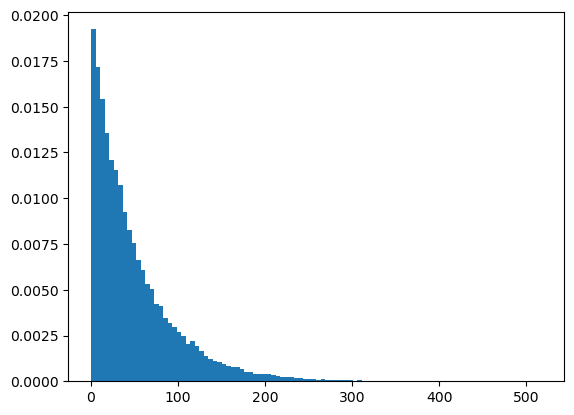

In [17]:
plt.hist(rvgen,density = True,bins=100);
rvexp = stat.expon
param = rvexp.fit(rvgen,floc=0)
param

In [18]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
with pm.Model() as Model:
    param = pm.Exponential("param",10, initval = rng.exponential(10))
    data_generator = pm.Poisson("data_generator", param)

In [19]:
with pm.Model() as Model:
    lambda_1 = pm.Exponential("lambda_1", 1.0,initval=0.5)
    lambda_2 = pm.Exponential("lambda_2", 3.0,initval=0.5)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

In [20]:
rvlam1 = pm.draw(lambda_1,draws=2000)
rvlam2 = pm.draw(lambda_2,draws=2000)

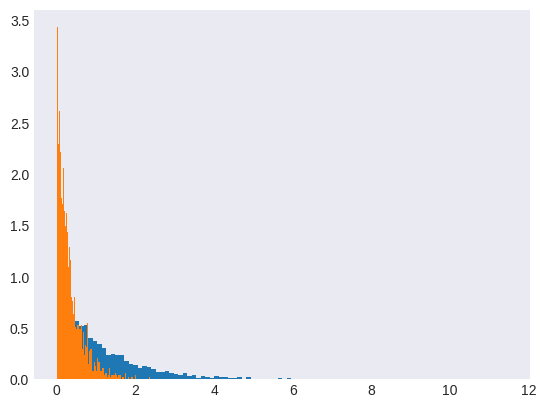

In [21]:
plt.style.use("seaborn-v0_8-dark")
plt.hist(rvlam1, density = True, bins=100);
plt.hist(rvlam2, density = True, bins=100);

In [22]:
plt.style.available;

In [23]:
data = np.array([10, 5])
with Model:
    obse= pm.Poisson("ose", lambda_, observed=data)

In [24]:
tau = np.random.randint(0,80)
tau

66

In [31]:
alpha = 1./20
lambda_1, lambda_2 = np.random.exponential(1/alpha,size=2)

In [32]:
lambda_1,lambda_2

(5.627387933406322, 29.30887336491339)

In [33]:
data = np.r_[stat.poisson.rvs(mu=lambda_1, size=tau), stat.poisson.rvs(mu=lambda_2, size = 80 - tau)]

<BarContainer object of 1 artists>

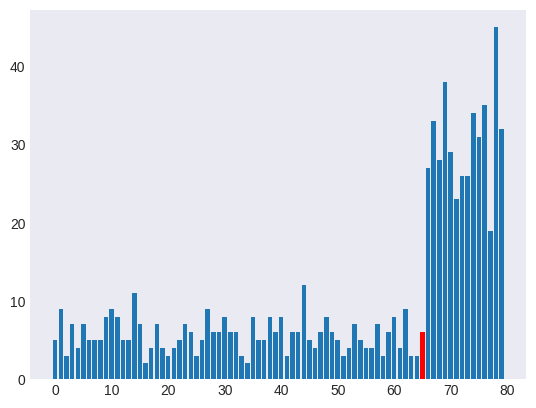

In [34]:
plt.bar(np.arange(80),data)
plt.bar(tau-1,data[tau-1],color='r')

In [35]:
with pm.Model() as model5:
    p1 = pm.Uniform('p1')#, lower=0, upper=1)
with pm.Model() as model3:
    p = pm.Uniform('p')#, lower=0, upper=1)

In [36]:
p_true= 0.06
N=10000
N_2 = 5000
occurences = stat.bernoulli.rvs(p_true,size=N)
occurences2 = stat.bernoulli.rvs(p_true,size=N_2)


In [37]:
occurences

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
occurences.mean(),occurences2.mean()

(0.0624, 0.0586)

In [39]:
with model5:
    observed = pm.Bernoulli("observed", p1, observed = occurences)



In [48]:
#include the observations, which are Bernoulli
with model5:
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(10000,step=step,chains=3)
    # trace2 = pm.sample(20000,step=step,chains=3)
    #default value of chains is 2, runs independent chains
    # We have a new data structure to burn in pymc current
    # if you use return_inferencedata=False, the code below will still work, but for little ArviZ, let's use the default True value.
    # burned_trace = trace[1000:] 

Multiprocess sampling (3 chains in 4 jobs)
Metropolis: [p1]


/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


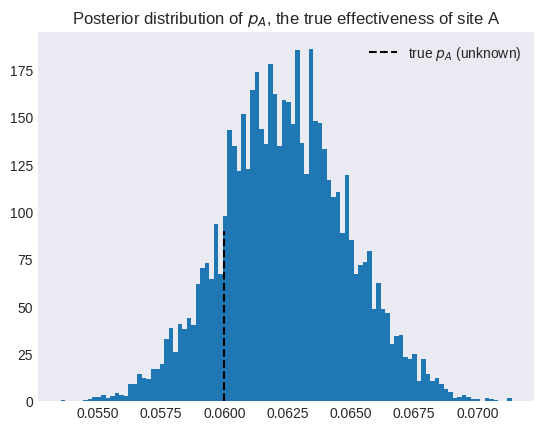

In [50]:
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)",color='black')
combine_3_chains = np.concatenate(trace.posterior.p1.data[:,1000:])
# combine_3_chains2 = np.concatenate(trace2.posterior.p.data[:,1000:])
# plt.hist( combine_3_chains2, bins=25, density=True)

plt.hist( combine_3_chains, bins=100, density=True)
plt.legend();